In [416]:
import numpy as np 
import pandas as pd

# To visualize the Data
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


# To Preprocessing the Data
from sklearn.preprocessing import LabelEncoder ,  StandardScaler , OrdinalEncoder , MinMaxScaler
from sklearn.impute import SimpleImputer , KNNImputer

# TO Iterate the Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [417]:
import pandas as pd

# Tải dữ liệu (giả sử file tên là 'heart.csv')
df_1 = pd.read_csv("./data/heart_1.csv")
df_2 = pd.read_csv("./data/heart_2.csv")
df_3 = pd.read_csv("./data/heart_3.csv")



In [418]:
df_1 = df_1.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalch': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'Oldpeak',
    'slope': 'ST_Slope',
    'ca': 'CA',
    'thal': 'Thal',
    'num': 'Target'
})

# Đổi tên cột trong df_2 (đã gần với tên chung, chỉ cần điều chỉnh một số cột)
df_2 = df_2.rename(columns={
    'HeartDisease': 'Target'
})

# Đổi tên cột trong df_3
df_3 = df_3.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBS',
    'restecg': 'RestingECG',
    'thalach': 'MaxHR',
    'exang': 'ExerciseAngina',
    'oldpeak': 'Oldpeak',
    'slope': 'ST_Slope',
    'ca': 'CA',
    'thal': 'Thal',
    'target': 'Target'
})


for col in ['CA', 'Thal']:
    if col not in df_2.columns:
        df_2[col] = pd.NA


df_1 = df_1.drop(columns=['id', 'dataset'], errors='ignore')

# Kiểm tra kết quả (in thông tin các cột)
print("df_1 columns:", df_1.columns.tolist())
print("df_2 columns:", df_2.columns.tolist())
print("df_3 columns:", df_3.columns.tolist())

df_1 columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'CA', 'Thal', 'Target']
df_2 columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'Target', 'CA', 'Thal']
df_3 columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'CA', 'Thal', 'Target']


In [419]:
D = pd.concat([df_1, df_2, df_3], ignore_index=True)

C:\Users\quanc\AppData\Local\Temp\ipykernel_972\410930851.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  D = pd.concat([df_1, df_2, df_3], ignore_index=True)


In [420]:
# kiểm tra xem có dòng dữ liệu nào bị trùng không
D.duplicated().value_counts()


False    2138
True      725
Name: count, dtype: int64

In [421]:
D.drop_duplicates(inplace=True)

In [422]:
D.duplicated().value_counts()

False    2138
Name: count, dtype: int64

In [423]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2138 entries, 0 to 2716
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2138 non-null   int64  
 1   Sex             2138 non-null   object 
 2   ChestPainType   2138 non-null   object 
 3   RestingBP       2079 non-null   float64
 4   Cholesterol     2109 non-null   float64
 5   FastingBS       2048 non-null   object 
 6   RestingECG      2136 non-null   object 
 7   MaxHR           2083 non-null   float64
 8   ExerciseAngina  2083 non-null   object 
 9   Oldpeak         2076 non-null   float64
 10  ST_Slope        1831 non-null   object 
 11  CA              611 non-null    float64
 12  Thal            736 non-null    object 
 13  Target          2138 non-null   int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 250.5+ KB


# Target

In [424]:
def column_summary(df, column_name):
    """
    In ra thống kê mô tả, giá trị duy nhất và số lượng NaN của một cột trong DataFrame.
    
    Parameters:
    - df: DataFrame chứa dữ liệu
    - column_name: Tên cột cần kiểm tra
    
    Returns:
    - None (chỉ in kết quả)
    """
    print(f"Thống kê mô tả của cột '{column_name}':")
    print(df[column_name].describe())
    print("\n Các giá trị duy nhất:")
    print(df[column_name].unique())
    print(f"Số lượng giá trị NaN: {df[column_name].isna().sum()}")


In [425]:
column_summary(D,'Target')

Thống kê mô tả của cột 'Target':
count    2138.000000
mean        0.741815
std         0.866223
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Target, dtype: float64

 Các giá trị duy nhất:
[0 2 1 3 4]
Số lượng giá trị NaN: 0


In [426]:
D['Target'] = D['Target'].replace({2: 1, 3: 1, 4: 1})


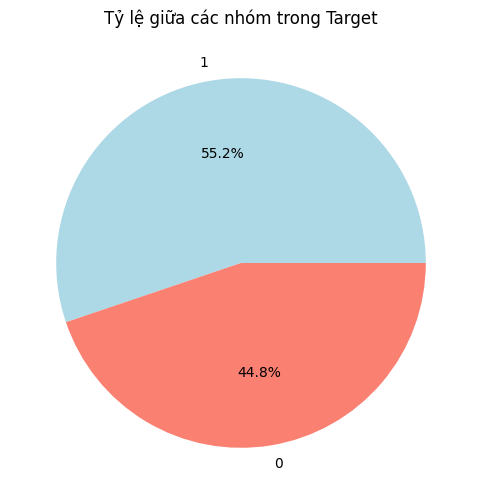

In [427]:
target_counts = D['Target'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Tỷ lệ giữa các nhóm trong Target")
plt.show()

# Xử lý col Age

In [428]:
print(D['Age'].describe())

print("NaN count:", D['Age'].isna().sum())

count    2138.000000
mean       53.639383
std         9.380307
min        28.000000
25%        47.000000
50%        54.000000
75%        60.000000
max        77.000000
Name: Age, dtype: float64
NaN count: 0


# SEX

In [429]:
print(D['Sex'].describe())

print("Unique values in Sex:")
print(D['Sex'].unique())


count     2138
unique       6
top       Male
freq       725
Name: Sex, dtype: object
Unique values in Sex:
['Male' 'Female' 'M' 'F' 1 0]


In [430]:
sex_mapping = {
    'Male': 1, 'M': 1, 1: 1,  # Nam
    'Female': 0, 'F': 0, 0: 0 # Nữ
}

# Xử lý Sex
D['Sex'] = D['Sex'].map(sex_mapping)  # Ánh xạ giá trị
D['Sex'] = pd.to_numeric(D['Sex'], errors='coerce').astype('int64')  # Chuyển thành int64, giá trị không ánh xạ được thành NaN

# Kiểm tra lại sau xử lý
print("\nAfter fixing Sex:")
print(D['Sex'].describe())
print("Unique values:", D['Sex'].unique())
print("NaN count:", D['Sex'].isna().sum())


After fixing Sex:
count    2138.000000
mean        0.774556
std         0.417972
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Sex, dtype: float64
Unique values: [1 0]
NaN count: 0


C:\Users\quanc\AppData\Local\Temp\ipykernel_972\1921585472.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=D['Sex'], palette=['lightblue', 'pink'])


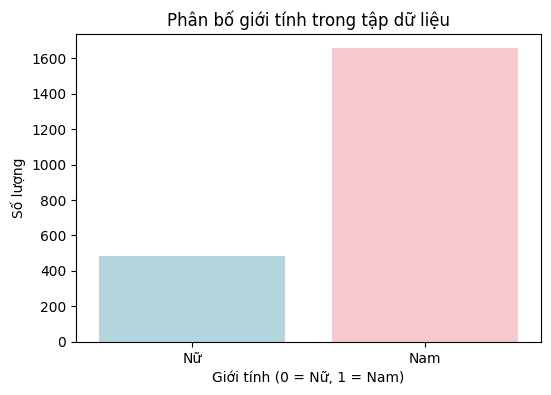

In [431]:
plt.figure(figsize=(6, 4))
sns.countplot(x=D['Sex'], palette=['lightblue', 'pink'])
plt.xlabel("Giới tính (0 = Nữ, 1 = Nam)")
plt.ylabel("Số lượng")
plt.title("Phân bố giới tính trong tập dữ liệu")
plt.xticks(ticks=[0, 1], labels=["Nữ", "Nam"])
plt.show()

# ChestPainType   

In [432]:

column_summary(D,'ChestPainType')

Thống kê mô tả của cột 'ChestPainType':
count             2138
unique              12
top       asymptomatic
freq               496
Name: ChestPainType, dtype: object

 Các giá trị duy nhất:
['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina' 'ATA'
 'NAP' 'ASY' 'TA' 0 1 2 3]
Số lượng giá trị NaN: 0


In [433]:
cp_mapping = {
    # Asymptomatic (0)
    'asymptomatic': 0, 'ASY': 0, 0: 0, '0': 0,
    # Typical Angina (1)
    'typical angina': 1, 'TA': 1, 1: 1, '1': 1,
    # Atypical Angina (2)
    'atypical angina': 2, 'ATA': 2, 2: 2, '2': 2,
    # Non-anginal pain (3)
    'non-anginal': 3, 'NAP': 3, 3: 3, '3': 3
}

# Xử lý ChestPainType
D['ChestPainType'] = D['ChestPainType'].map(cp_mapping)  # Ánh xạ giá trị
D['ChestPainType'] = pd.to_numeric(D['ChestPainType'], errors='coerce').astype('int64')  # Chuyển thành int64

# Kiểm tra lại sau xử lý
print("\nAfter fixing ChestPainType:")
print(D['ChestPainType'].describe())
print("Unique values:", D['ChestPainType'].unique())
print("NaN count:", D['ChestPainType'].isna().sum())


After fixing ChestPainType:
count    2138.000000
mean        1.072498
std         1.237339
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         3.000000
Name: ChestPainType, dtype: float64
Unique values: [1 0 3 2]
NaN count: 0


# RestingBP

In [434]:
column_summary(D, 'RestingBP')

Thống kê mô tả của cột 'RestingBP':
count    2079.000000
mean      132.174122
std        18.602950
min         0.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: RestingBP, dtype: float64

 Các giá trị duy nhất:
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185. 116.   0.  96. 127. 133. 137. 139. 131. 141. 143.]
Số lượng giá trị NaN: 59


In [435]:
# Xử lý giá trị bất thường (0 -> NaN)
D['RestingBP'] = D['RestingBP'].replace(0, pd.NA)

# Điền NaN bằng trung vị (median)
median_bp = D['RestingBP'].median()
D['RestingBP'] = D['RestingBP'].fillna(median_bp)

# Đảm bảo kiểu dữ liệu
D['RestingBP'] = pd.to_numeric(D['RestingBP'], errors='coerce').astype('float64')

# Kiểm tra lại sau xử lý
print("\nAfter fixing RestingBP:")
print(D['RestingBP'].describe())
print("Unique values:", D['RestingBP'].unique())
print("NaN count:", D['RestingBP'].isna().sum())


After fixing RestingBP:
count    2138.000000
mean      132.235734
std        17.896824
min        80.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: RestingBP, dtype: float64
Unique values: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190. 113.  92.  95.  80.
 185. 116.  96. 127. 133. 137. 139. 131. 141. 143.]
NaN count: 0


C:\Users\quanc\AppData\Local\Temp\ipykernel_972\2261696493.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  D['RestingBP'] = D['RestingBP'].fillna(median_bp)


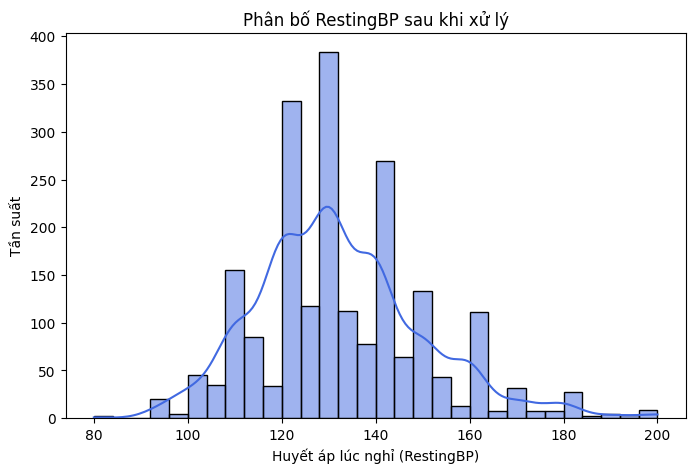

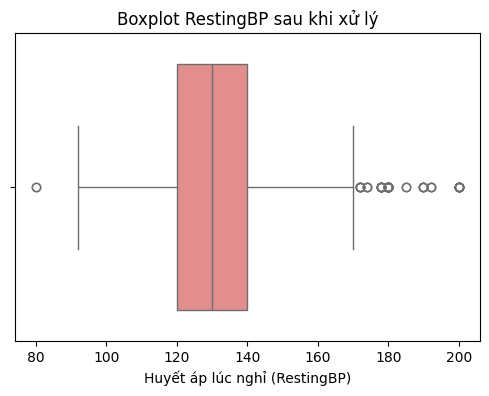

In [436]:
plt.figure(figsize=(8, 5))
sns.histplot(D['RestingBP'], bins=30, kde=True, color='royalblue')
plt.xlabel("Huyết áp lúc nghỉ (RestingBP)")
plt.ylabel("Tần suất")
plt.title("Phân bố RestingBP sau khi xử lý")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=D['RestingBP'], color='lightcoral')
plt.xlabel("Huyết áp lúc nghỉ (RestingBP)")
plt.title("Boxplot RestingBP sau khi xử lý")
plt.show()


# Cholesterol     

In [437]:
column_summary(D, 'Cholesterol')

Thống kê mô tả của cột 'Cholesterol':
count    2109.000000
mean      205.760076
std       105.072543
min         0.000000
25%       184.000000
50%       226.000000
75%       269.000000
max       603.000000
Name: Cholesterol, dtype: float64

 Các giá trị duy nhất:
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564. 246. 322. 299. 300. 293. 277. 214.
 207. 223. 160. 394. 184. 315. 409. 244. 195. 196. 126. 313. 259. 200.
 262. 215. 228. 193. 271. 210. 327. 149. 295. 306. 178. 237. 218. 242.
 319. 166. 180. 311. 278. 

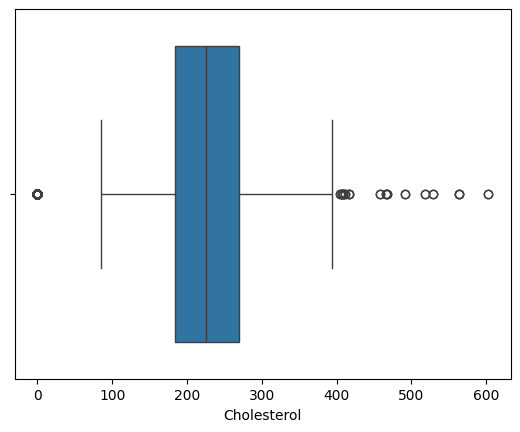

In [438]:
sns.boxplot(x=D['Cholesterol'])
plt.show()


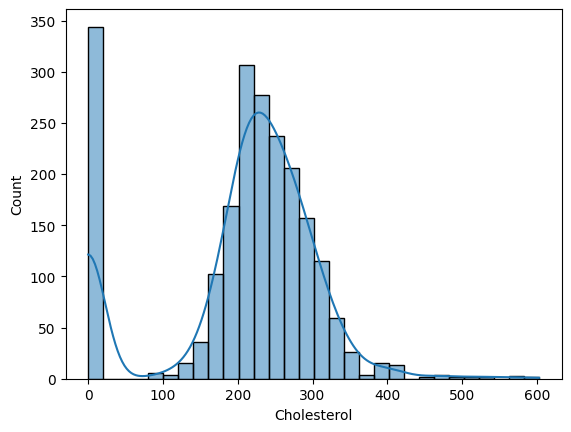

In [439]:
sns.histplot(D['Cholesterol'], bins=30, kde=True)
plt.show()


In [440]:
# Xử lý giá trị bất thường (0 -> NaN)
D['Cholesterol'] = D['Cholesterol'].replace(0, pd.NA)

# Điền NaN bằng trung vị (median)
median_bp = D['Cholesterol'].median()
D['Cholesterol'] = D['Cholesterol'].fillna(median_bp)

# Đảm bảo kiểu dữ liệu
D['Cholesterol'] = pd.to_numeric(D['Cholesterol'], errors='coerce').astype('float64')

# Kiểm tra lại sau xử lý
print("\nAfter fixing RestingBP:")
print(D['Cholesterol'].describe())
print("NaN count:", D['Cholesterol'].isna().sum())


After fixing RestingBP:
count    2138.000000
mean      244.665575
std        52.476311
min        85.000000
25%       215.000000
50%       239.000000
75%       268.000000
max       603.000000
Name: Cholesterol, dtype: float64
NaN count: 0


C:\Users\quanc\AppData\Local\Temp\ipykernel_972\2724275509.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  D['Cholesterol'] = D['Cholesterol'].fillna(median_bp)


In [441]:
def clip_outliers_iqr(df, column_name):
    """
    Xử lý ngoại lệ bằng phương pháp IQR (clip giá trị về ngưỡng hợp lý).
    
    Parameters:
    - df: DataFrame chứa dữ liệu
    - column_name: Tên cột cần xử lý
    
    Returns:
    - DataFrame sau khi đã clip giá trị ngoại lệ
    """
    Q1 = df[column_name].quantile(0.25)  # 25th percentile
    Q3 = df[column_name].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Xác định giới hạn dưới và trên
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip giá trị ngoại lệ
    df[column_name] = df[column_name].clip(lower=lower_bound, upper=upper_bound)

    return df[column_name].describe()

clip_outliers_iqr(D,"Cholesterol")

count    2138.000000
mean      242.755379
std        44.597485
min       135.500000
25%       215.000000
50%       239.000000
75%       268.000000
max       347.500000
Name: Cholesterol, dtype: float64

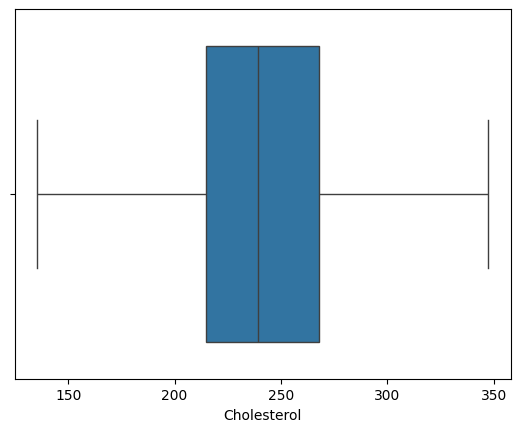

In [442]:
sns.boxplot(x=D['Cholesterol'])
plt.show()


<Axes: xlabel='Cholesterol', ylabel='Count'>

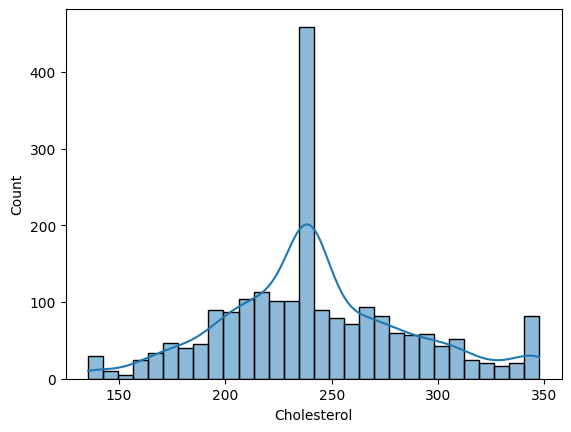

In [443]:
sns.histplot(D['Cholesterol'], bins=30, kde=True)


# FastingBS


In [444]:
column_summary(D, 'FastingBS')

Thống kê mô tả của cột 'FastingBS':
count      2048
unique        2
top       False
freq       1651
Name: FastingBS, dtype: object

 Các giá trị duy nhất:
[True False nan]
Số lượng giá trị NaN: 90


In [445]:
D['FastingBS'] = D['FastingBS'].map({True: 1, False: 0})

# Điền NaN bằng giá trị phổ biến nhất (mode)
D['FastingBS'] = D['FastingBS'].fillna(D['FastingBS'].mode()[0])

# Kiểm tra lại sau xử lý
column_summary(D, "FastingBS")

Thống kê mô tả của cột 'FastingBS':
count    2138.000000
mean        0.185688
std         0.388945
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FastingBS, dtype: float64

 Các giá trị duy nhất:
[1. 0.]
Số lượng giá trị NaN: 0


C:\Users\quanc\AppData\Local\Temp\ipykernel_972\1199800758.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=['skyblue', 'salmon'])


Text(0.5, 1.0, 'Phân bố giá trị FastingBS')

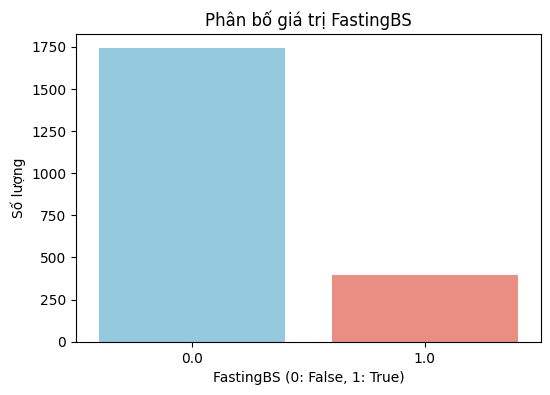

In [446]:
value_counts = D['FastingBS'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values, palette=['skyblue', 'salmon'])

# Gắn nhãn
plt.xlabel("FastingBS (0: False, 1: True)")
plt.ylabel("Số lượng")
plt.title("Phân bố giá trị FastingBS")

# RestingECG


In [447]:
column_summary(D,'RestingECG')

Thống kê mô tả của cột 'RestingECG':
count       2136
unique         9
top       Normal
freq         552
Name: RestingECG, dtype: object

 Các giá trị duy nhất:
['lv hypertrophy' 'normal' 'st-t abnormality' nan 'Normal' 'ST' 'LVH' 1 0
 2]
Số lượng giá trị NaN: 2


In [448]:
mapping_ecg = {
    "normal": 0,
    "Normal": 0,
    "st-t abnormality": 1,
    "lv hypertrophy": 2,
    "st": 1,   
    "lvh": 2    
}

D["RestingECG"] = D["RestingECG"].replace(mapping_ecg)

D["RestingECG"] = pd.to_numeric(D["RestingECG"], errors="coerce")
D["RestingECG"].fillna(D["RestingECG"].mode()[0], inplace=True)  
D["RestingECG"] = D["RestingECG"].astype(int)
D["RestingECG"].value_counts()

C:\Users\quanc\AppData\Local\Temp\ipykernel_972\1791212457.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  D["RestingECG"].fillna(D["RestingECG"].mode()[0], inplace=True)


RestingECG
0    1617
1     329
2     192
Name: count, dtype: int64

# MaxHR

In [449]:
column_summary(D, 'MaxHR')

Thống kê mô tả của cột 'MaxHR':
count    2083.000000
mean      138.963034
std        25.672194
min        60.000000
25%       120.000000
50%       140.000000
75%       159.000000
max       202.000000
Name: MaxHR, dtype: float64

 Các giá trị duy nhất:
[150. 108. 129. 187. 172. 178. 160. 163. 147. 155. 148. 153. 142. 173.
 162. 174. 168. 139. 171. 144. 132. 158. 114. 151. 161. 179. 120. 112.
 137. 157. 169. 165. 123. 128. 152. 140. 188. 109. 125. 131. 170. 113.
  99. 177. 141. 180. 111. 143. 182. 156. 115. 149. 145. 146. 175. 186.
 185. 159. 130. 190. 136.  97. 127. 154. 133. 126. 202. 103. 166. 164.
 184. 124. 122.  96. 138.  88. 105. 194. 195. 106. 167.  95. 192. 117.
 121. 116.  71. 118. 181. 134.  90.  98. 176. 135. 110.  nan 100.  87.
 102.  92.  91.  82. 119.  94. 104.  60.  83.  63.  70.  77.  72.  78.
  86.  93.  67.  84.  80. 107.  69.  73.]
Số lượng giá trị NaN: 55


In [450]:
D['MaxHR'] = D['MaxHR'].fillna(D['MaxHR'].median())
column_summary(D, 'MaxHR')


Thống kê mô tả của cột 'MaxHR':
count    2138.00000
mean      138.98971
std        25.34021
min        60.00000
25%       120.00000
50%       140.00000
75%       158.00000
max       202.00000
Name: MaxHR, dtype: float64

 Các giá trị duy nhất:
[150. 108. 129. 187. 172. 178. 160. 163. 147. 155. 148. 153. 142. 173.
 162. 174. 168. 139. 171. 144. 132. 158. 114. 151. 161. 179. 120. 112.
 137. 157. 169. 165. 123. 128. 152. 140. 188. 109. 125. 131. 170. 113.
  99. 177. 141. 180. 111. 143. 182. 156. 115. 149. 145. 146. 175. 186.
 185. 159. 130. 190. 136.  97. 127. 154. 133. 126. 202. 103. 166. 164.
 184. 124. 122.  96. 138.  88. 105. 194. 195. 106. 167.  95. 192. 117.
 121. 116.  71. 118. 181. 134.  90.  98. 176. 135. 110. 100.  87. 102.
  92.  91.  82. 119.  94. 104.  60.  83.  63.  70.  77.  72.  78.  86.
  93.  67.  84.  80. 107.  69.  73.]
Số lượng giá trị NaN: 0


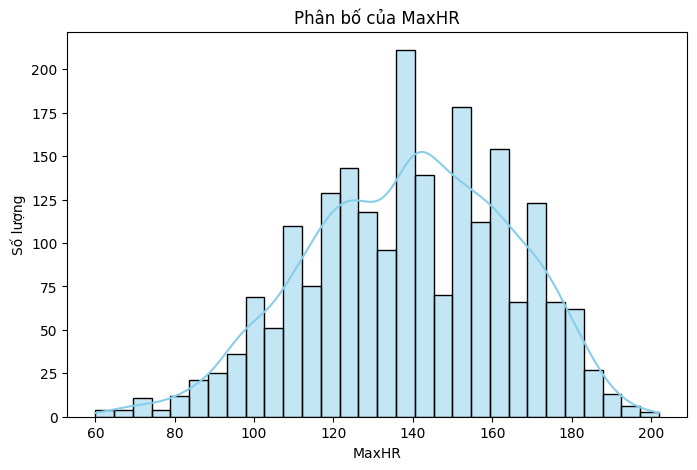

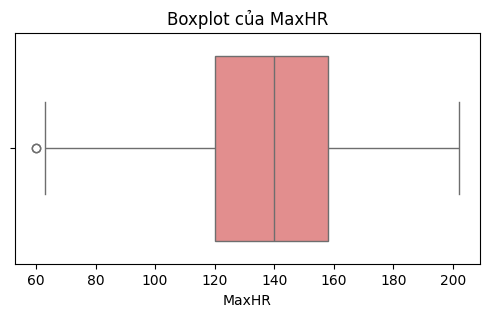

In [451]:
plt.figure(figsize=(8, 5))
sns.histplot(D['MaxHR'], bins=30, kde=True, color='skyblue')
plt.xlabel("MaxHR")
plt.ylabel("Số lượng")
plt.title("Phân bố của MaxHR")
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=D['MaxHR'], color='lightcoral')
plt.xlabel("MaxHR")
plt.title("Boxplot của MaxHR")
plt.show()

# ExerciseAngina

In [452]:
column_summary(D, 'ExerciseAngina')


Thống kê mô tả của cột 'ExerciseAngina':
count      2083
unique        4
top       False
freq        730
Name: ExerciseAngina, dtype: object

 Các giá trị duy nhất:
[False True nan 'N' 'Y']
Số lượng giá trị NaN: 55


C:\Users\quanc\AppData\Local\Temp\ipykernel_972\448268981.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  D['ExerciseAngina'] = D['ExerciseAngina'].replace({'Y': 1, 'N': 0, True: 1, False: 0})
C:\Users\quanc\AppData\Local\Temp\ipykernel_972\448268981.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=D['ExerciseAngina'], palette=['lightblue', 'salmon'])


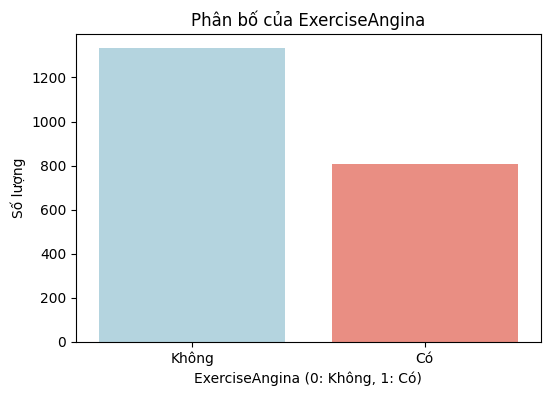

In [453]:
# Chuẩn hóa giá trị
D['ExerciseAngina'] = D['ExerciseAngina'].replace({'Y': 1, 'N': 0, True: 1, False: 0})
D['ExerciseAngina'] = D['ExerciseAngina'].fillna(D['FastingBS'].mode()[0])

# Chuyển thành kiểu số nguyên
D['ExerciseAngina'] = D['ExerciseAngina'].astype(int)

# trực quan hóa dữ liệu
plt.figure(figsize=(6, 4))
sns.countplot(x=D['ExerciseAngina'], palette=['lightblue', 'salmon'])

# Thêm nhãn
plt.xlabel("ExerciseAngina (0: Không, 1: Có)")
plt.ylabel("Số lượng")
plt.title("Phân bố của ExerciseAngina")
plt.xticks(ticks=[0, 1], labels=["Không", "Có"])
plt.show()

# Oldpeak


In [454]:
column_summary(D,'Oldpeak')

Thống kê mô tả của cột 'Oldpeak':
count    2076.000000
mean        0.907322
std         1.092068
min        -2.600000
25%         0.000000
50%         0.600000
75%         1.500000
max         6.200000
Name: Oldpeak, dtype: float64

 Các giá trị duy nhất:
[ 2.3  1.5  2.6  3.5  1.4  0.8  3.6  0.6  3.1  0.4  1.3  0.   0.5  1.6
  1.   1.2  0.2  1.8  3.2  2.4  2.   2.5  2.2  2.8  3.   3.4  6.2  4.
  5.6  2.9  0.1  2.1  1.9  4.2  0.9  1.1  3.8  0.7  0.3  4.4  5.   nan
 -1.1 -1.5 -0.1 -2.6 -0.7 -2.  -1.   1.7 -0.8 -0.5 -0.9  3.7]
Số lượng giá trị NaN: 62


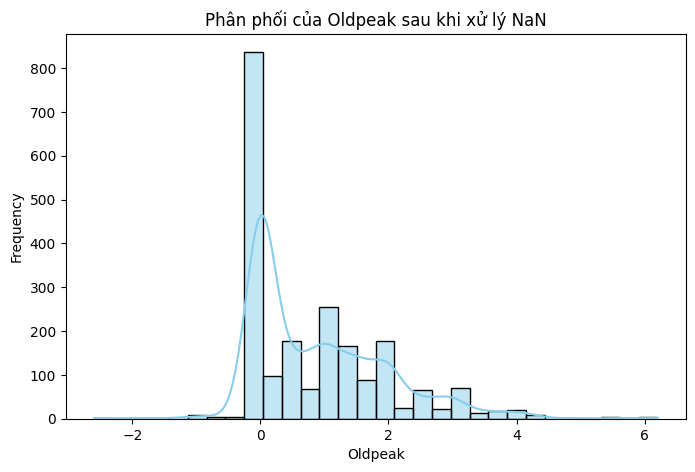

In [455]:
D['Oldpeak'] = D['Oldpeak'].fillna(D['Oldpeak'].median())

# Vẽ biểu đồ histogram
plt.figure(figsize=(8, 5))
sns.histplot(D['Oldpeak'], bins=30, kde=True, color='skyblue')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.title('Phân phối của Oldpeak sau khi xử lý NaN')
plt.show()

# ST_Slope

In [456]:
column_summary(D,'ST_Slope')

Thống kê mô tả của cột 'ST_Slope':
count     1831
unique       9
top       Flat
freq       460
Name: ST_Slope, dtype: object

 Các giá trị duy nhất:
['downsloping' 'flat' 'upsloping' nan 'Up' 'Flat' 'Down' 2 0 1]
Số lượng giá trị NaN: 307


In [457]:
D['ST_Slope'] = D['ST_Slope'].replace({
    'upsloping': 2, 'Up': 2,
    'flat': 1, 'Flat': 1,
    'downsloping': 0, 'Down': 0
})

# Điền giá trị NaN bằng mode
D['ST_Slope'] = D['ST_Slope'].fillna(D['ST_Slope'].mode()[0])

D['ST_Slope'] = D['ST_Slope'].astype(int)

C:\Users\quanc\AppData\Local\Temp\ipykernel_972\3572202480.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  D['ST_Slope'] = D['ST_Slope'].replace({


C:\Users\quanc\AppData\Local\Temp\ipykernel_972\2013105049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=D['ST_Slope'], palette='pastel')


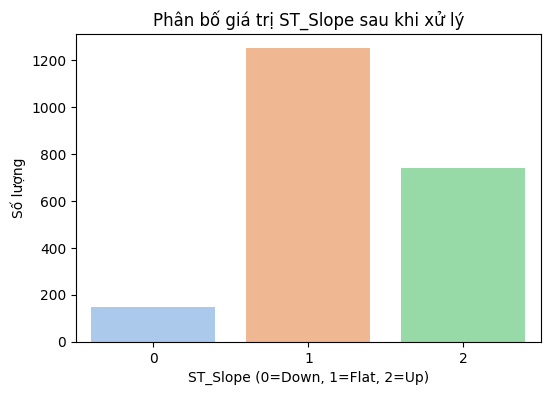

In [458]:
plt.figure(figsize=(6, 4))
sns.countplot(x=D['ST_Slope'], palette='pastel')
plt.xlabel("ST_Slope (0=Down, 1=Flat, 2=Up)")
plt.ylabel("Số lượng")
plt.title("Phân bố giá trị ST_Slope sau khi xử lý")
plt.show()

# CA

In [459]:
column_summary(D,'CA')

Thống kê mô tả của cột 'CA':
count    611.000000
mean       0.697218
std        0.970875
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: CA, dtype: float64

 Các giá trị duy nhất:
[ 0.  3.  2.  1. nan  4.]
Số lượng giá trị NaN: 1527


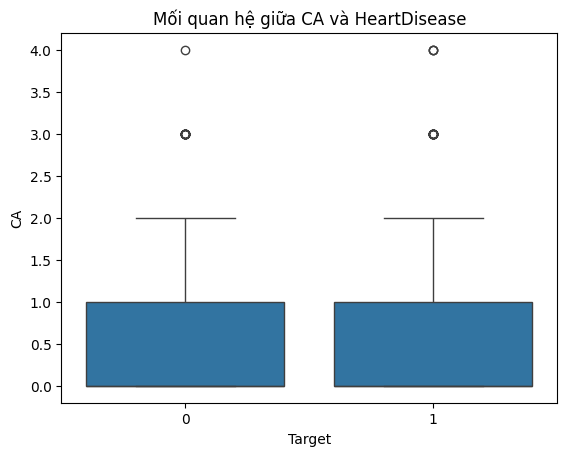

In [460]:
sns.boxplot(x=D['Target'], y=D['CA'])
plt.title("Mối quan hệ giữa CA và HeartDisease")
plt.show()

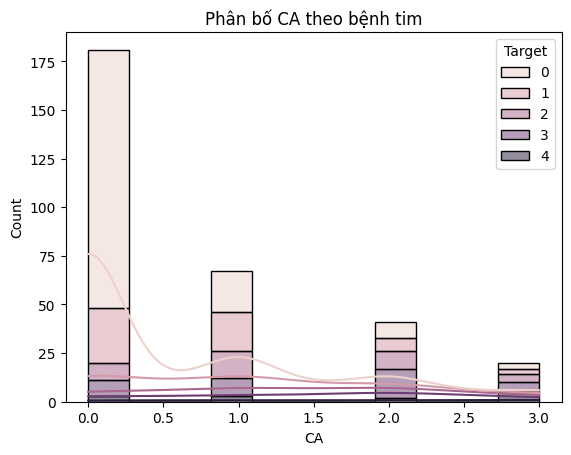

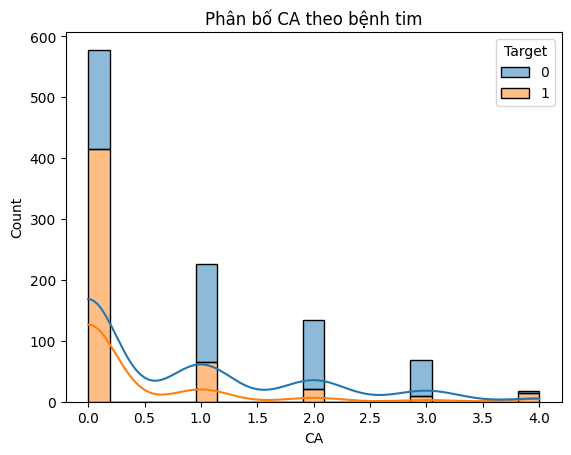

In [461]:
sns.histplot(df_1, x="CA", hue="Target", multiple="stack", kde=True)
plt.title("Phân bố CA theo bệnh tim")
plt.show()


sns.histplot(df_3, x="CA", hue="Target", multiple="stack", kde=True)
plt.title("Phân bố CA theo bệnh tim")
plt.show()



In [462]:
print(df_1[['CA', 'Target']].corr())
print(df_3[['CA', 'Target']].corr())


              CA    Target
CA      1.000000  0.516216
Target  0.516216  1.000000
              CA    Target
CA      1.000000 -0.382085
Target -0.382085  1.000000


C:\Users\quanc\AppData\Local\Temp\ipykernel_972\22189846.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_1['CA'], label='df_1', shade=True)
C:\Users\quanc\AppData\Local\Temp\ipykernel_972\22189846.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_3['CA'], label='df_2', shade=True)


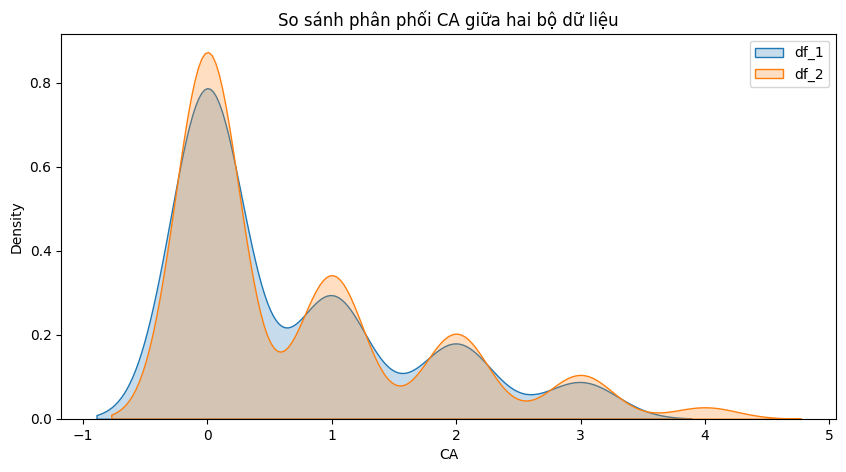

In [463]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df_1['CA'], label='df_1', shade=True)
sns.kdeplot(df_3['CA'], label='df_2', shade=True)
plt.legend()
plt.title('So sánh phân phối CA giữa hai bộ dữ liệu')
plt.show()

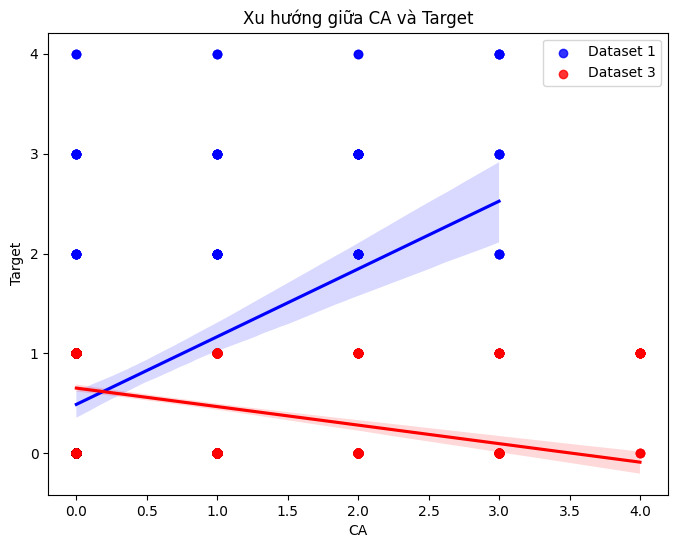

In [464]:
# tạm thời drop 
plt.figure(figsize=(8, 6))

# Hồi quy df_1
sns.regplot(x=df_1["CA"], y=df_1["Target"], scatter_kws={"color": "blue"}, line_kws={"color": "blue"}, label="Dataset 1")

# Hồi quy df_3
sns.regplot(x=df_3["CA"], y=df_3["Target"], scatter_kws={"color": "red"}, line_kws={"color": "red"}, label="Dataset 3")

plt.legend()
plt.title("Xu hướng giữa CA và Target")
plt.show()


### quá nhiều NaN chiếm 2/3 bộ dữ liệu và tương quan ngược giữa 2 bộ dataset df_1 và df_3

In [465]:
D = D.drop(columns=["CA"])

# Thal

In [466]:
column_summary(D,'Thal')

Thống kê mô tả của cột 'Thal':
count        736
unique         7
top       normal
freq         196
Name: Thal, dtype: object

 Các giá trị duy nhất:
['fixed defect' 'normal' 'reversable defect' nan 3 2 1 0]
Số lượng giá trị NaN: 1402


In [467]:
# Mapping từ chuỗi sang số
thal_mapping = {"normal": 1, "fixed defect": 2, "reversable defect": 3}
D["Thal"].replace(0, np.nan, inplace=True)
# Thay thế chữ bằng số
D["Thal"] = D["Thal"].replace(thal_mapping)

# Kiểm tra lại các giá trị sau khi thay thế
print(D["Thal"].unique())


[ 2.  1.  3. nan]


C:\Users\quanc\AppData\Local\Temp\ipykernel_972\206983847.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  D["Thal"].replace(0, np.nan, inplace=True)
C:\Users\quanc\AppData\Local\Temp\ipykernel_972\206983847.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  D["Thal"] = D["Thal"].replace(thal_ma

In [468]:
df_1["Thal"] = df_1["Thal"].replace(thal_mapping)
df_1 = df_1.dropna(subset=["Thal"])  
print(df_1["Thal"].corr(df_1["Target"]))  
print(df_3["Thal"].corr(df_3["Target"]))  
print(df_1["Thal"].unique(), df_3["Thal"].unique())


0.4274462619756136
-0.33783815045718496
[2. 1. 3.] [3 2 1 0]


C:\Users\quanc\AppData\Local\Temp\ipykernel_972\1052452449.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1["Thal"] = df_1["Thal"].replace(thal_mapping)


##### lại tương quan ngược và thiếu dữ liệu 

In [469]:
D = D.drop(columns=["Thal"])

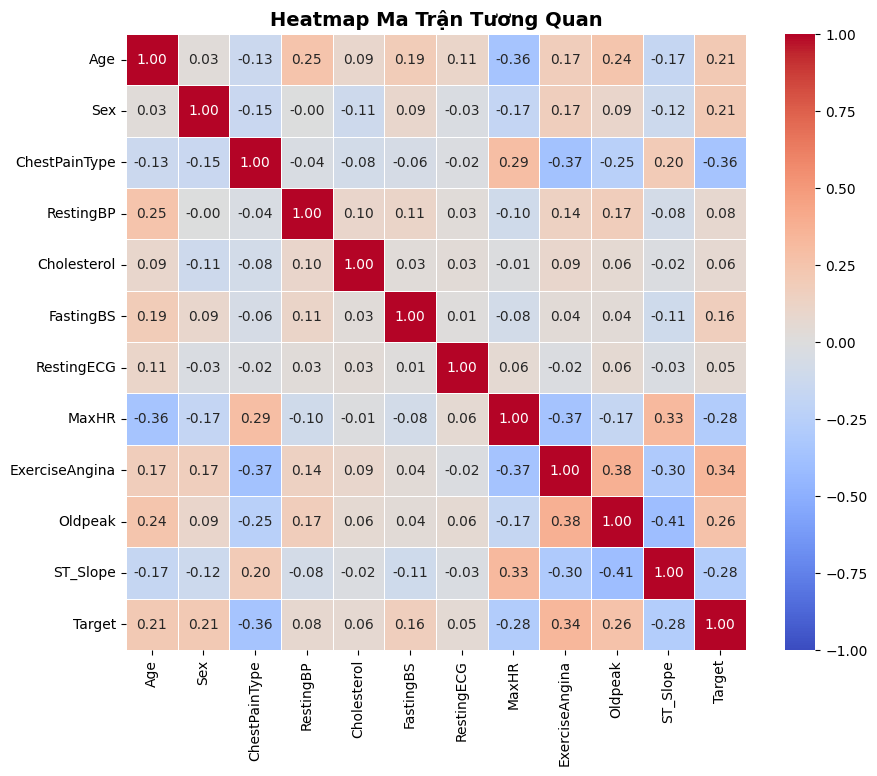

In [470]:

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(D.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Tiêu đề
plt.title("Heatmap Ma Trận Tương Quan", fontsize=14, fontweight="bold")

# Hiển thị biểu đồ
plt.show()

In [472]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

# Tách X (đặc trưng) và y (nhãn)
X = D.drop(columns=["Target"])
X = X.dropna()
y = D["Target"]

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Giữ nguyên dạng DataFrame

# Chia tập train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="linear")
}

# Huấn luyện và đánh giá
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# In kết quả
best_model = max(results, key=results.get)
print(f"\n🔥 Mô hình tốt nhất: {best_model} với độ chính xác {results[best_model]:.4f}")

Logistic Regression Accuracy: 0.7243
Random Forest Accuracy: 0.7617
KNN Accuracy: 0.7033
SVM Accuracy: 0.7150

🔥 Mô hình tốt nhất: Random Forest với độ chính xác 0.7617


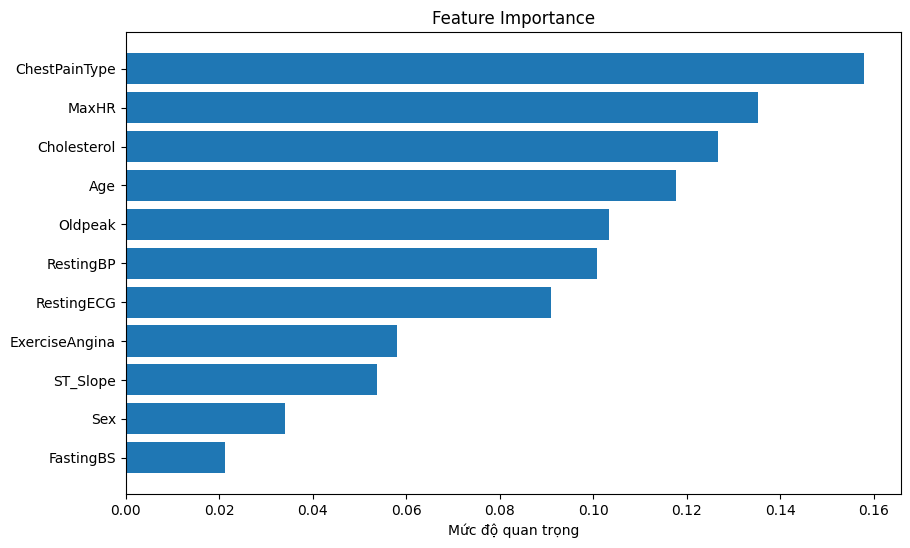

In [473]:

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Hiển thị mức độ quan trọng của các đặc trưng
importances = model.feature_importances_
feature_names = X_train.columns
sorted_idx = importances.argsort()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Mức độ quan trọng")
plt.title("Feature Importance")
plt.show()

In [476]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Số cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để chia nút
    'min_samples_leaf': [1, 2, 4]     # Số mẫu tối thiểu trong một lá
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy: 0.7719298245614035


In [478]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

from sklearn.metrics import accuracy_score
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))


XGBoost Accuracy: 0.7570093457943925
